# 이미지 인식
- 고양이 강아지 사진 구분
- CNN 이용
- 원래 데이터는 25,000개 (고양이 + 강아지)
- 여기서는 2000개로 학습을 시킨다, 검증은 1000개의 이미지 사용 
- colab에서 실행 (런타임-유형변경-GPU 설정)

## 신경망 성능 개선
- 과대적합과 과소적합을 피해야 한다

##  과대적합

- 모델이 훈련 데이터에 대해서만 잘 동작하도록 만들어져서 새로운 데이터에 대해서는 오히려 잘 동작하지 못하는 경우를 과대적합(over fitting)되었다고 한다
- 머신러닝에서는 과대적합을 피해서 일반적으로 잘 동작하게 모델을 만드는 것이 매우 중요하다
- 이를 모델의 일반화(generalization)라고 한다. 
- 일반화 방법
  - 모델을 단순하게 만든다
  - 더 많은 훈련 데이터 확보한다
  - 훈련 데이터에서 잡음을 줄인다 (아웃라이어 등)
 
- 규제화: 일반화를 위해서 모델을 단순하게 만드는 것을 모델에 제약을 가한다고 하여 규제화(regularization)라고 한다
- 과대적합 발생여부는 성능 및 손실함수의 변화를 보고 판단한다 (훈련 및 검증 데이터에 대한 결과비교)

- 신경망은 파라미터 갯수가 많아서 과대적합할 가능성이 항상 높다. 훈련 데이터 양이 많지 않을 때에는 특히 주의해야 한다. 
- 과대적합이 발생하면 신경망의 구조를 단순하게 만들어야 한다. 
- 그러나 신경망 구조를 너무 단순하게 만들면 표현 능력이 줄어들어 성능이 떨어지게 된다. 과소적합이 발생하는지를 살펴보아야 한다. 


<img src='https://github.com/StillWork/image/blob/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-03-14%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%204.24.12.png?raw=1' align='left' width=400>


<img  src='https://github.com/StillWork/image/blob/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-03-14%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%204.23.54.png?raw=1' align='left' width=400>

# 데이터

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import keras
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import zipfile
import matplotlib.image as mpimg
import os, os.path, shutil

## 데이터 다운로드
- cliend URL 명령으로 데이터 다운로드

In [2]:
!curl -L \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -o ./cats_and_dogs_filtered.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0 65.4M    0 15222    0     0  14038      0  1:21:27  0:00:01  1:21:26 14081
  0 65.4M    0 94576    0     0  65596      0  0:17:25  0:00:01  0:17:24 65677
  7 65.4M    7 4704k    0     0  1992k      0  0:00:33  0:00:02  0:00:31 1994k
 23 65.4M   23 15.5M    0     0  4743k      0  0:00:14  0:00:03  0:00:11 4746k
 39 65.4M   39 25.9M    0     0  6093k      0  0:00:10  0:00:04  0:00:06 6096k
 55 65.4M   55 36.3M    0     0  6948k      0  0:00:09  0:00:05  0:00:04 8708k
 70 65.4M   70 46.4M    0     0  7478k      0  0:00:08  0:00:06  0:00:02 9652k
 83 65.4M   83 54.6M    0     0  7607k      0  0:00:08  0:00:07  0:00:01 10.0M
100 65.4M  100 65.4M    0     0  8020k      0  0:00:08  0:00:08 --:--:--  9.9M


In [5]:
# 압축 풀기
with zipfile.ZipFile("cats_and_dogs_filtered.zip", 'r') as z: 
    print(z.namelist()) 
    z.extractall() 

['cats_and_dogs_filtered/', 'cats_and_dogs_filtered/vectorize.py', 'cats_and_dogs_filtered/validation/', 'cats_and_dogs_filtered/train/', 'cats_and_dogs_filtered/validation/dogs/', 'cats_and_dogs_filtered/validation/dogs/dog.2127.jpg', 'cats_and_dogs_filtered/validation/dogs/dog.2126.jpg', 'cats_and_dogs_filtered/validation/dogs/dog.2125.jpg', 'cats_and_dogs_filtered/validation/dogs/dog.2124.jpg', 'cats_and_dogs_filtered/validation/dogs/dog.2123.jpg', 'cats_and_dogs_filtered/validation/dogs/dog.2122.jpg', 'cats_and_dogs_filtered/validation/dogs/dog.2121.jpg', 'cats_and_dogs_filtered/validation/dogs/dog.2120.jpg', 'cats_and_dogs_filtered/validation/dogs/dog.2119.jpg', 'cats_and_dogs_filtered/validation/dogs/dog.2118.jpg', 'cats_and_dogs_filtered/validation/dogs/dog.2117.jpg', 'cats_and_dogs_filtered/validation/dogs/dog.2116.jpg', 'cats_and_dogs_filtered/validation/dogs/dog.2115.jpg', 'cats_and_dogs_filtered/validation/dogs/dog.2114.jpg', 'cats_and_dogs_filtered/validation/dogs/dog.2113.

In [9]:
!dir cat*  # 윈도우에서 폴더 확인

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 8084-41C7

 C:\Users\User\Dropbox\lab\book13 디렉터리

2023-08-28  오전 01:29    <DIR>          cats_and_dogs_filtered
2023-08-28  오전 01:27        68,606,236 cats_and_dogs_filtered.zip

 C:\Users\User\Dropbox\lab\book13 디렉터리


 C:\Users\User\Dropbox\lab\book13 디렉터리


 C:\Users\User\Dropbox\lab\book13 디렉터리


 C:\Users\User\Dropbox\lab\book13 디렉터리

               1개 파일          68,606,236 바이트
               1개 디렉터리  148,558,213,120 바이트 남음


In [10]:
# !unzip -q cats_and_dogs_filtered.zip # 리눅스 머신에서 압축풀기

- 폴더 이름 alias로 관리

In [11]:
base_dir = './cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# 훈련 데이터 (이미지)가 있는 폴더
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# 검증 데이터 (이미지)가 있는 폴더
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [12]:
train_cats_dir

'./cats_and_dogs_filtered\\train\\cats'

## 이미지 확인

In [13]:
train_cat_fnames = os.listdir(train_cats_dir)
print(train_cat_fnames[:10])

train_dog_fnames = os.listdir(train_dogs_dir)
train_dog_fnames.sort() #  주의: sort() 결과는 리스트에  즉시 반영된다
print(train_dog_fnames[:10])

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.101.jpg', 'cat.102.jpg', 'cat.103.jpg', 'cat.104.jpg', 'cat.105.jpg', 'cat.106.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


- 파일(이미지) 갯수

In [14]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500


## 이미지 샘플 보기

(399, 253, 3)


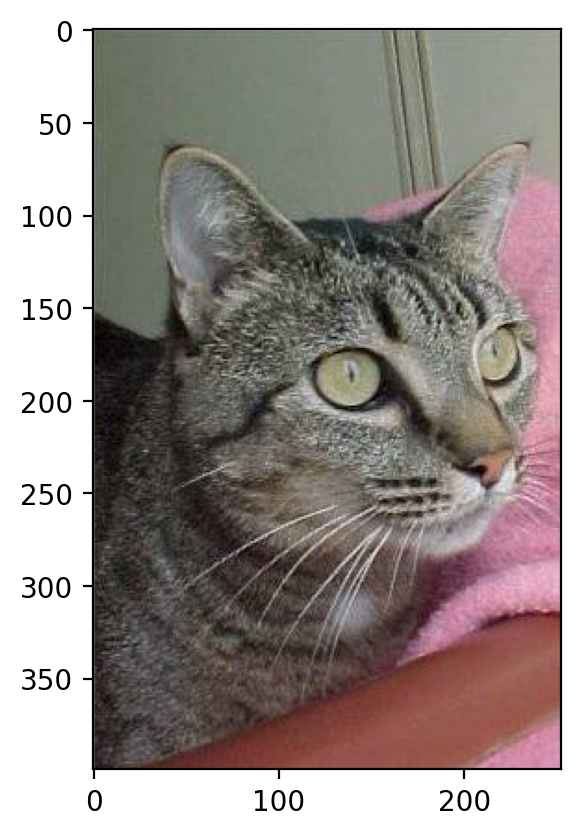

In [15]:
img_path = os.path.join(train_cats_dir, train_cat_fnames[7]) 
img = mpimg.imread(img_path)
print(img.shape)
plt.imshow(img)

# CNN 모델
- 이미지는 테이블에 담을 수 없으므로 폴더에서 이미지를 하나씩 불러와야 한다. ImageDataGenerator를 사용한다
- 참조 (https://stackoverflow.com/questions/53634924/keras-imagedatagenerator-equivalent-for-csv-files)


In [16]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

- 그림의 크기를 일정하게 바꾸어 사용한다
  - 150*150

## data augmentation과 드롭아웃

In [18]:
img_width = 150
img_height = 150

train_datagen = ImageDataGenerator(
  rescale= 1./255,
  rotation_range = 60,
  width_shift_range = 0.4,
  height_shift_range = 0.2,
  shear_range=0.2,
  zoom_range=0.2,
  horizontal_flip = True)

validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(directory=train_dir,
											   target_size=(img_width,img_height),
 											   classes=['cats','dogs'],
											   batch_size=20)

validation_generator = validation_datagen.flow_from_directory(directory=validation_dir,
											   target_size=(img_width,img_height),
 											   classes=['cats','dogs'],
											   batch_size=20)


model = models.Sequential()

model.add(layers.Conv2D(32,(3,3), activation = 'relu', 
                        input_shape=(img_width, img_height, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(2, activation='softmax')) 

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## 모델 학습

In [19]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(),
              metrics=['accuracy'])
callbacks_list = [keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)]

history = model.fit_generator(
    generator=train_generator, 
    epochs=50,
    callbacks=callbacks_list,
    validation_data=validation_generator)

C:\Users\User\AppData\Local\Temp\ipykernel_21836\1553521595.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/50
100/100 [==============================] - 40s 389ms/step - loss: 0.7023 - accuracy: 0.4930 - val_loss: 0.6900 - val_accuracy: 0.5000
Epoch 2/50
100/100 [==============================] - 48s 477ms/step - loss: 0.6936 - accuracy: 0.5285 - val_loss: 0.6798 - val_accuracy: 0.5800
Epoch 3/50
100/100 [==============================] - 49s 488ms/step - loss: 0.6841 - accuracy: 0.5735 - val_loss: 0.6791 - val_accuracy: 0.5130
Epoch 4/50
100/100 [==============================] - 49s 487ms/step - loss: 0.6703 - accuracy: 0.5710 - val_loss: 0.6419 - val_accuracy: 0.6010
Epoch 5/50
100/100 [==============================] - 50s 501ms/step - loss: 0.6677 - accuracy: 0.5825 - val_loss: 0.6498 - val_accuracy: 0.5800
Epoch 6/50
100/100 [==============================] - 51s 511ms/step - loss: 0.6687 - accuracy: 0.6060 - val_loss: 0.6128 - val_accuracy: 0.6670
Epoch 7/50
100/100 [==============================] - 52s 521ms/step - loss: 0.6492 - accuracy: 0.6170 - val_loss: 0.6168 - val_ac

- 동작 확인 함수

In [20]:
def show_4_graphs(history):
    plt.figure(figsize=(6, 4))
    plt.plot(history.history['accuracy'], 'r', label='Accuracy of training data')
    plt.plot(history.history['val_accuracy'], 'b', label='Accuracy of validation data')
    plt.plot(history.history['loss'], 'r--', label='Loss of training data')
    plt.plot(history.history['val_loss'], 'b--', label='Loss of validation data')
    plt.title('Model Accuracy and Loss')
    plt.ylabel('Accuracy and Loss')
    plt.xlabel('Training Epoch')
    plt.ylim(0)
    plt.legend()
    plt.show()

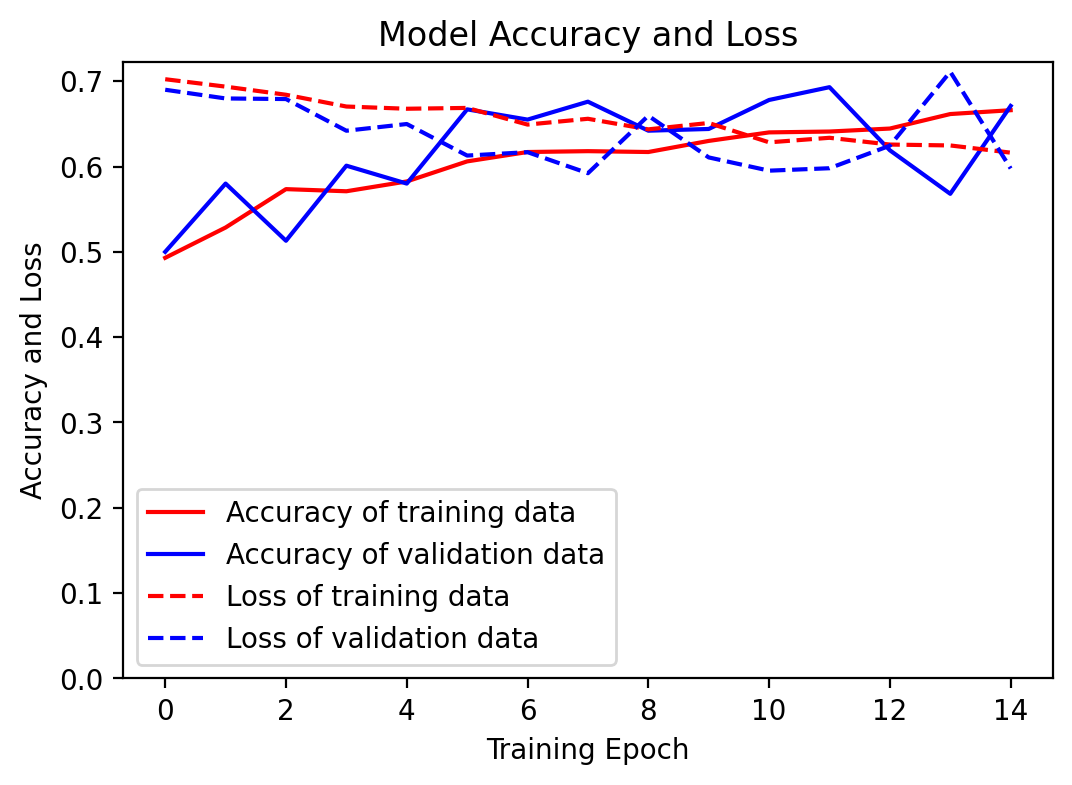

In [21]:
show_4_graphs(history)

# 모델 적용


##  강아지 사진으로  테스트

- 모델의 출력에는 클래스 확률이 리턴된다 (고양이, 강아지)일 확률
- 신경망에서는 predict()가 클래스 확률을 리턴한다

In [39]:
# 아래는 한번만 실행하면 된다 (이미지를 처리하기 위해서 opencv 설치)
# !pip install opencv-python

In [26]:
import cv2
# 강아지 검증 사진이 있는 폴더
folder = validation_dogs_dir

images = [] # 원본 이미지를 담는 리스트
processed_images = [] # 전처리된 이미지를 담는 리스트

# 데이터 전처리
for file in os.listdir(folder):
    image = mpimg.imread(os.path.join(folder, file))
    if image is not None:
        rescaled = cv2.resize(image, (150, 150))/255.0
        images.append(image)
        processed_images.append(rescaled)

# 리스트를 어레이로 바꾸어준다
processed_images = np.array(processed_images)

# 모델의 출력에는 클래스 확률이 리턴된다 (고양이, 강아지)일 확률
# 신경망에서는 predict()가 클래스 확률을 리턴한다
predictions = model.predict(processed_images)

16/16 [==============================] - 2s 101ms/step


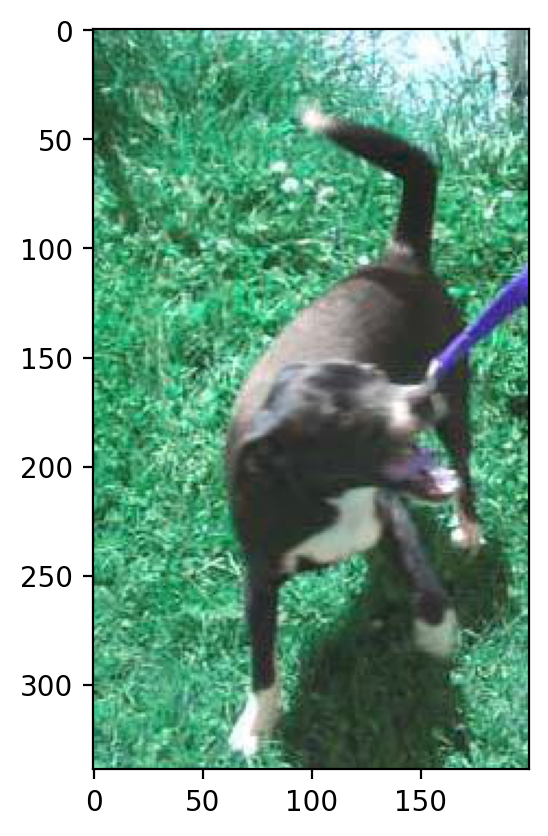

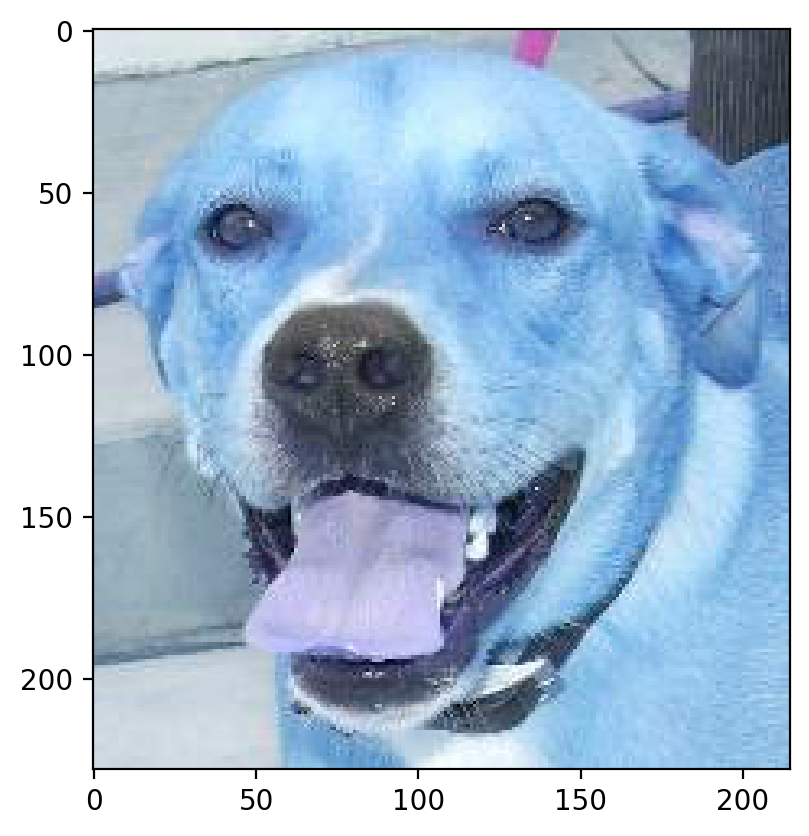

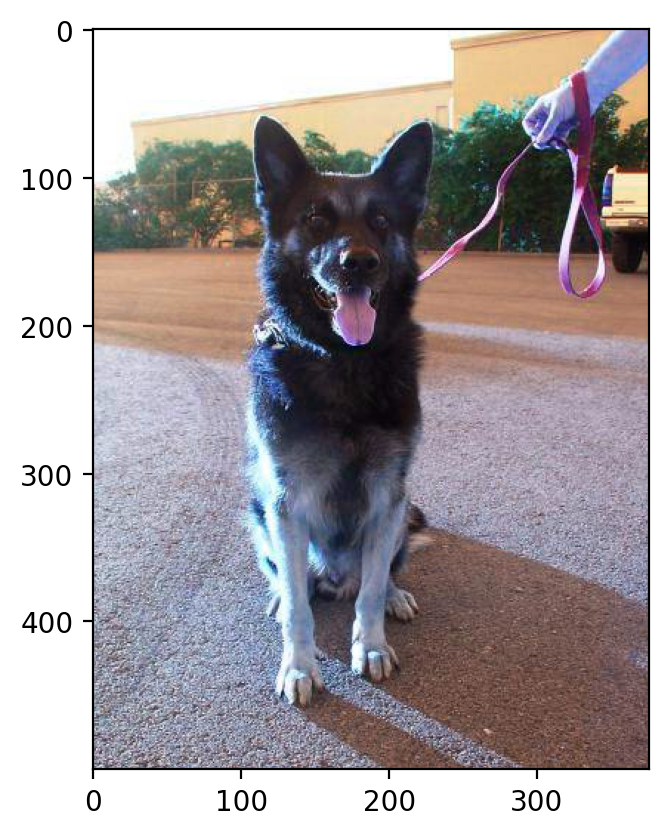

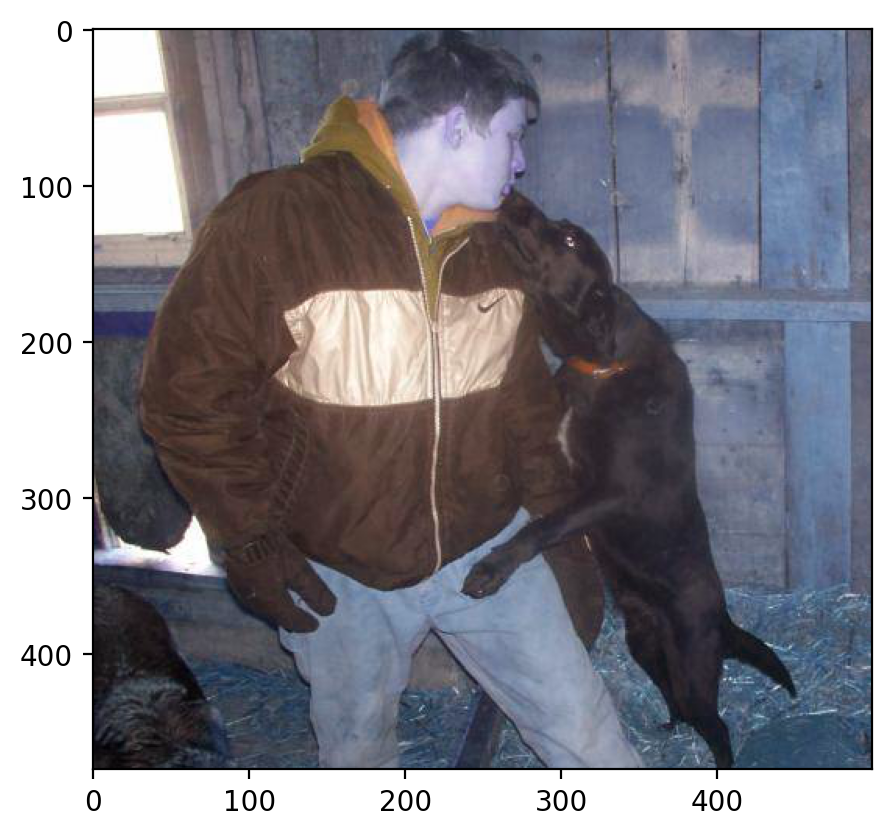

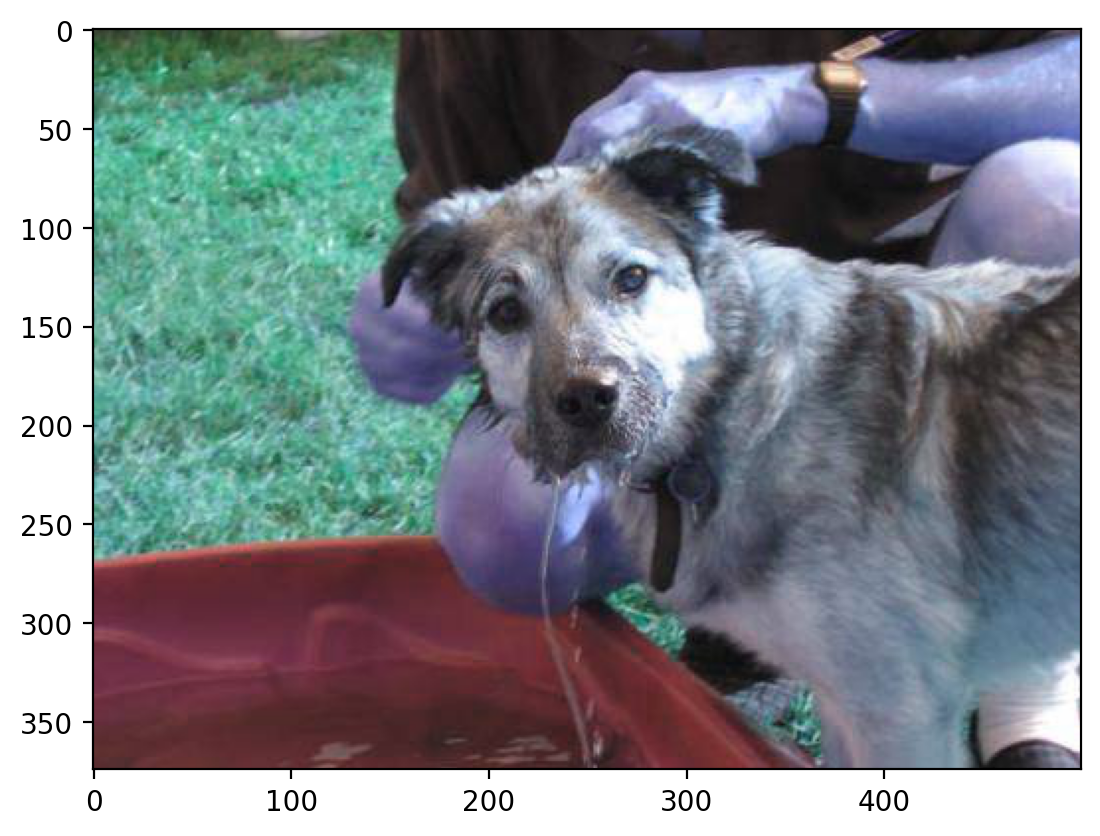

In [27]:
# 샘플 사진 보기
for index in range(5):
     plt.imshow(cv2.cvtColor(images[index], cv2.COLOR_BGR2RGB))
     plt.show()

In [28]:
# 강아지로 판독할 클래스 확률
predictions[:5][:,1]

array([0.9999862 , 0.41409367, 0.71511716, 0.65878856, 0.9790506 ],
      dtype=float32)

In [29]:
# 판독 결과
(predictions[:5][:,1]  > 0.5)

array([ True, False,  True,  True,  True])

## 고양이 사진으로  테스트

In [30]:
# 고양이 검증 사진이 있는 폴더
folder = validation_cats_dir 

images = [] # 원본 이미지를 담는 리스트
processed_images = []  # 전처리된 이미지를 담는 리스트

# 데이터 전처리
for file in os.listdir(folder):
    image = mpimg.imread(os.path.join(folder, file))
    if image is not None:
        rescaled = cv2.resize(image, (150, 150))/255.0
        images.append(image)
        processed_images.append(rescaled)

processed_images = np.array(processed_images)
# 신경망에서는 predict()가 클래스 확률을 리턴한다
predictions = model.predict(processed_images)

16/16 [==============================] - 2s 105ms/step


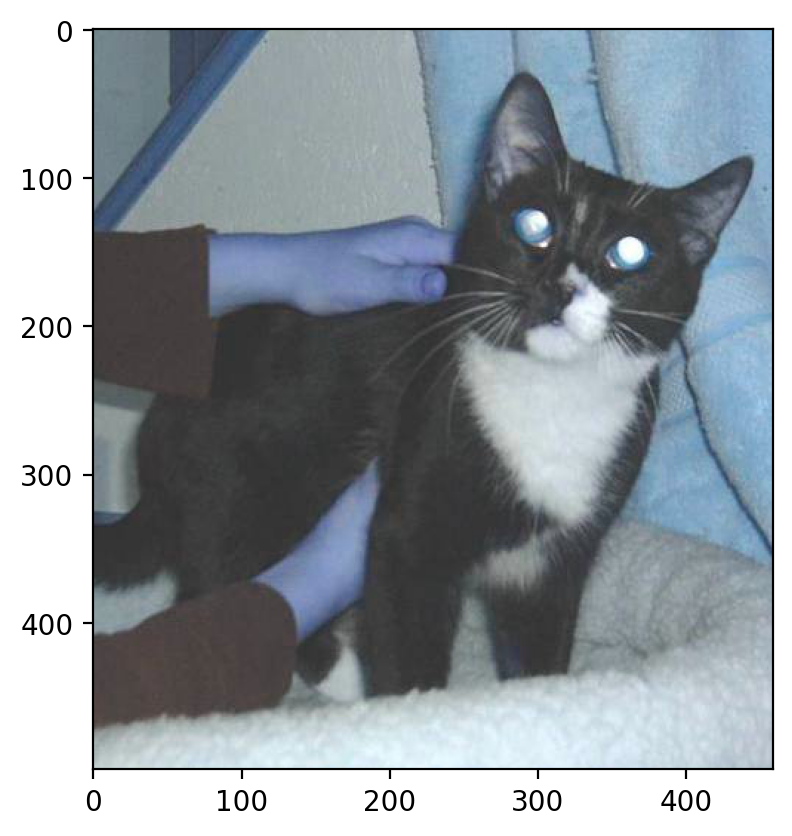

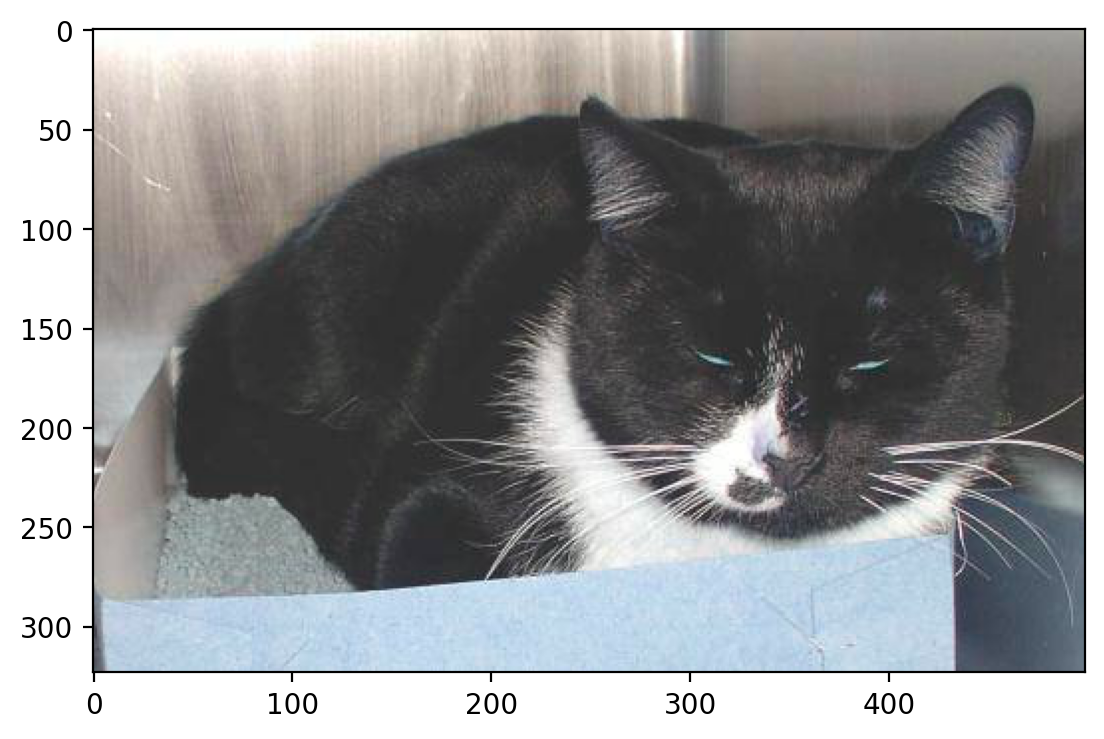

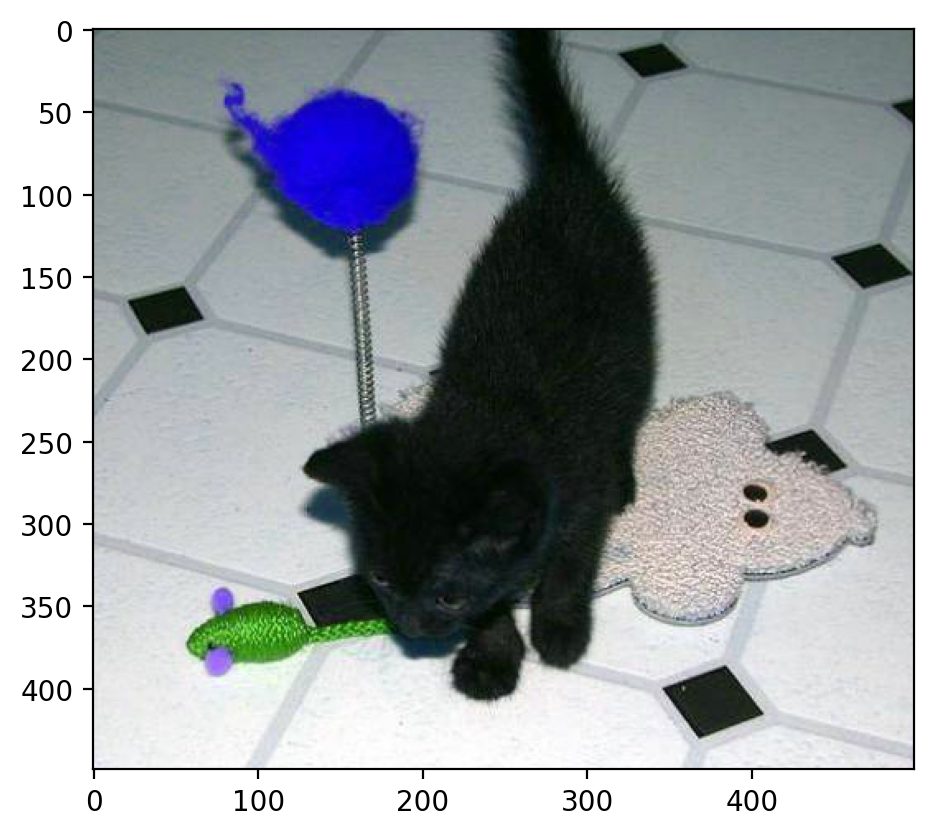

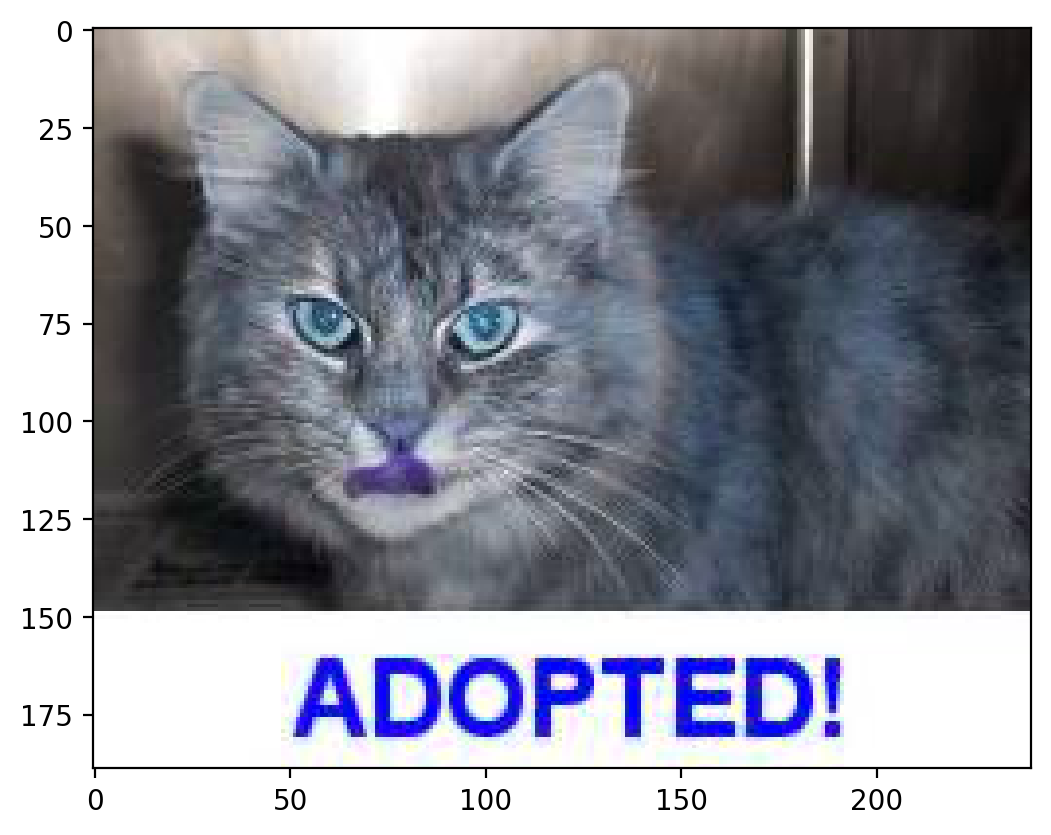

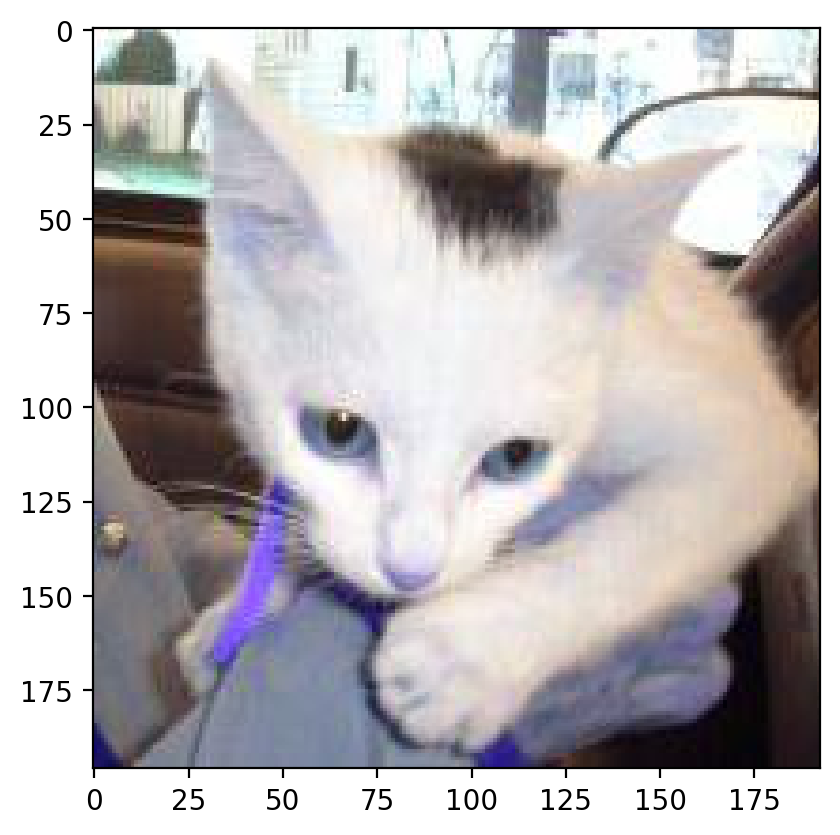

In [31]:
# 샘플 사진 보기
for index in range(5):
     plt.imshow(cv2.cvtColor(images[index], cv2.COLOR_BGR2RGB))
     plt.show()

In [36]:
# 고양이로 판독할 클래스 확률
predictions[:5][:,0]

array([0.45761606, 0.5844809 , 0.23405665, 0.649963  , 0.63515985],
      dtype=float32)

In [37]:
# 판독 결과
(predictions[:,0] > 0.5)[:5]

array([False,  True, False,  True,  True])

## 이미지를 한장씩 판독하는 방법

- 샘플이 하나라도 머신러닝 입력으로는 2차원 테이블 구조를 입력해야 한다
- 즉, 한 행(샘플)으로 구성된 2차원 어레이를 만들어야 한다
- 어레이 img의 차원을 하나 높이는 방법으로 img = img[np.newaxis, ...]를 사용한다
- 레이블은 (cat, dog)순으로 (0, 1)로 원핫인코딩되어 있다 (알파벳 순임)

In [38]:
for i, img in enumerate(processed_images[:5]):
     img = img[np.newaxis, ...]
     prob = model.predict(img)
     if prob[:,1] > 0.5:
        print(i, "강아지")
     if prob[:,1] < 0.5:
        print(i, "고양이")

1/1 [==============================] - 0s 24ms/step
0 강아지
1/1 [==============================] - 0s 28ms/step
1 고양이
1/1 [==============================] - 0s 35ms/step
2 강아지
1/1 [==============================] - 0s 43ms/step
3 고양이
1/1 [==============================] - 0s 34ms/step
4 고양이
